Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
from prepare import pull_OPS_csv
from prepare import prep_OPS_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

In [3]:
df = pull_OPS_csv(url)

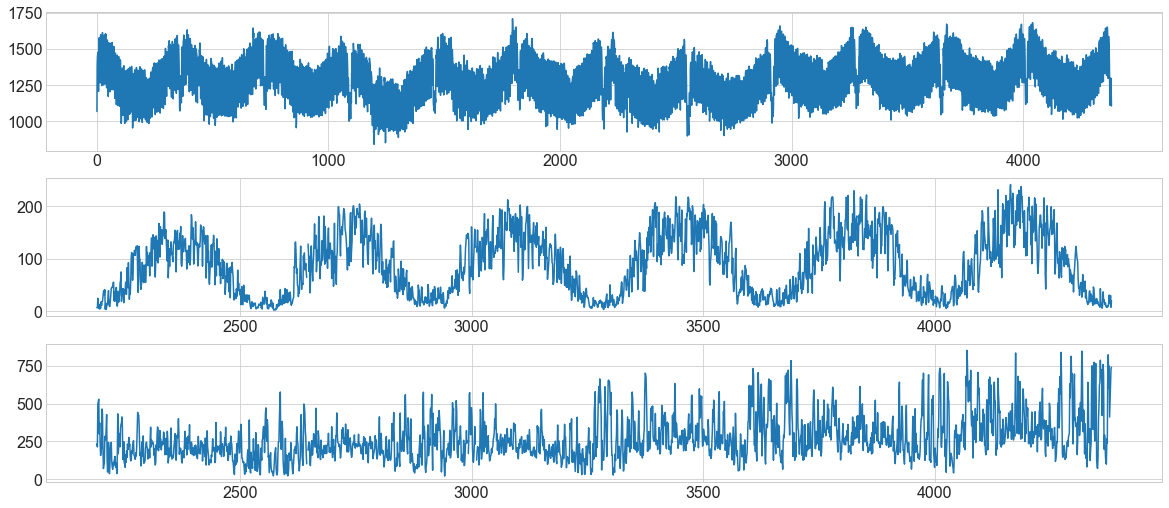

In [4]:
df = prep_OPS_data(df)

In [5]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,2006


In [6]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index #(13576 is test, all 31676 is train)

3068

In [7]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index (70)
                              # do validate too 
test = df[test_start_index:] # everything from the test_start_index to the end (30) 

In [8]:
train.shape

(3068, 6)

In [9]:
test.shape

(1315, 6)

In [10]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,2006


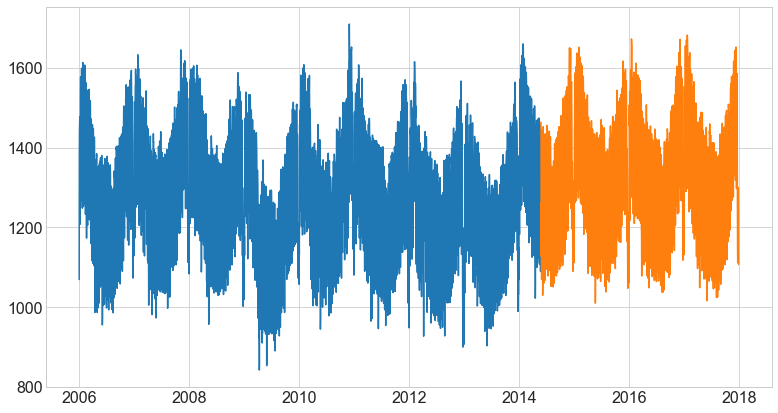

In [11]:
# lets plot train and test
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [12]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


<AxesSubplot:ylabel='Frequency'>

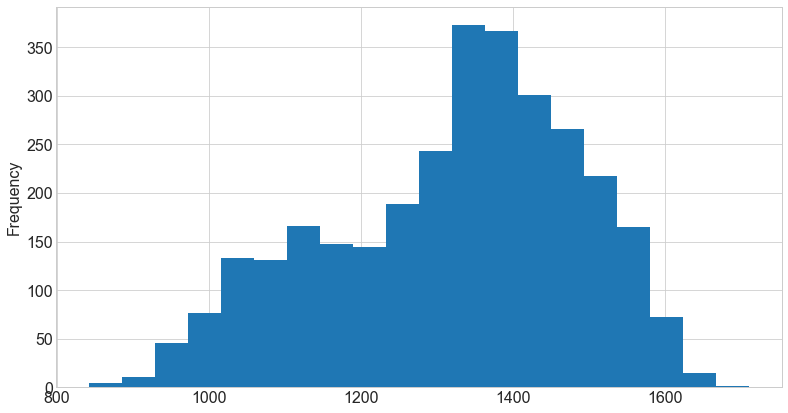

In [13]:
# plot a histogram of temperature
train.Consumption.plot.hist(bins= 20)

<AxesSubplot:ylabel='Frequency'>

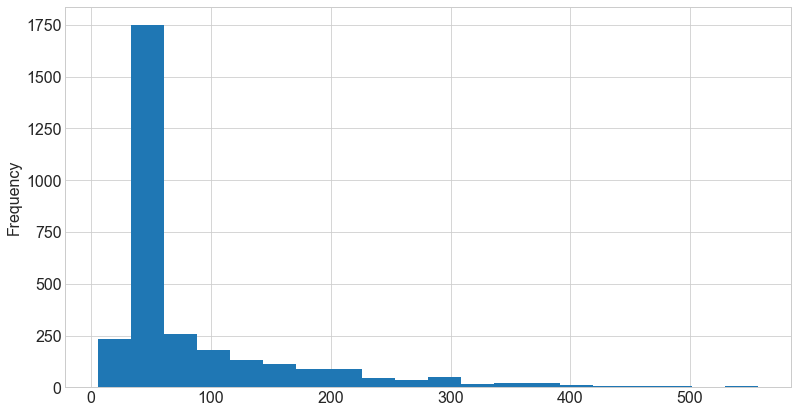

In [14]:
# plot a histogram of temperature
train.Wind.plot.hist(bins= 20)

<AxesSubplot:ylabel='Frequency'>

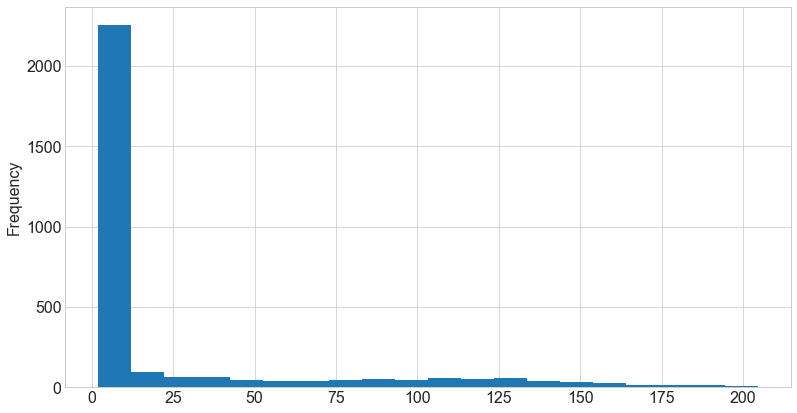

In [15]:
# plot a histogram of temperature
train.Solar.plot.hist(bins= 20)

<AxesSubplot:ylabel='Frequency'>

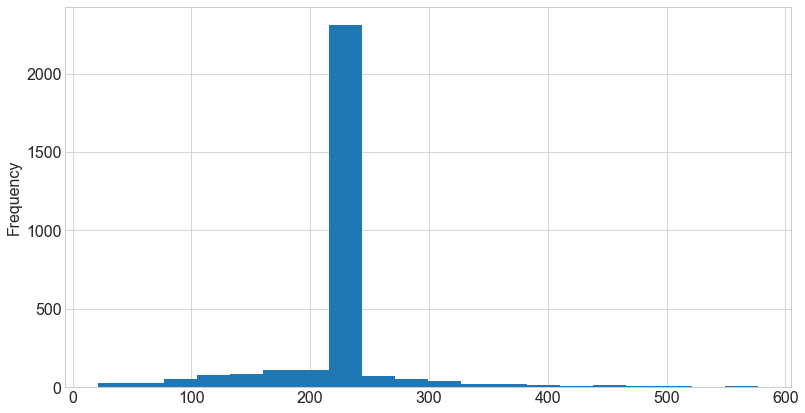

In [16]:
# plot a histogram of temperature
train['Wind+Solar'].plot.hist(bins= 20)

In [17]:
# make new column named month
train['month'] = train.Consumption.index.month

In [18]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,1,2006
2006-01-02,1380.521,48.709,6.587,234.052,1,2006
2006-01-03,1442.533,48.709,6.587,234.052,1,2006
2006-01-04,1457.217,48.709,6.587,234.052,1,2006
2006-01-05,1477.131,48.709,6.587,234.052,1,2006


<AxesSubplot:xlabel='year'>

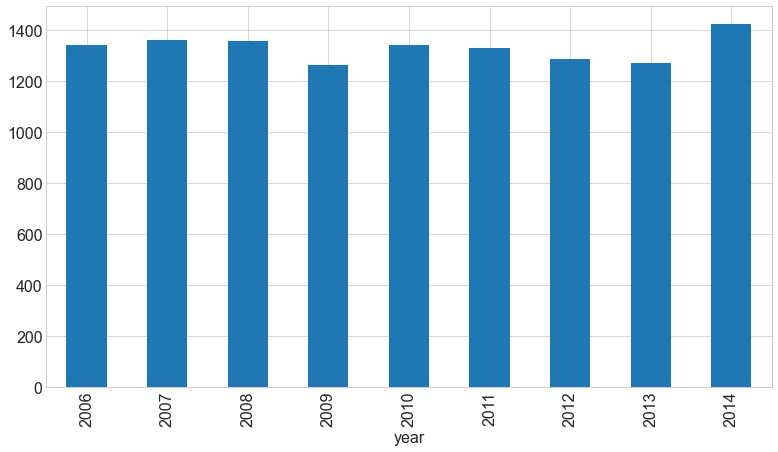

In [19]:
# Plot mean temperature by month (bar plot)
train.groupby('year').Consumption.mean().plot.bar()

<AxesSubplot:xlabel='month'>

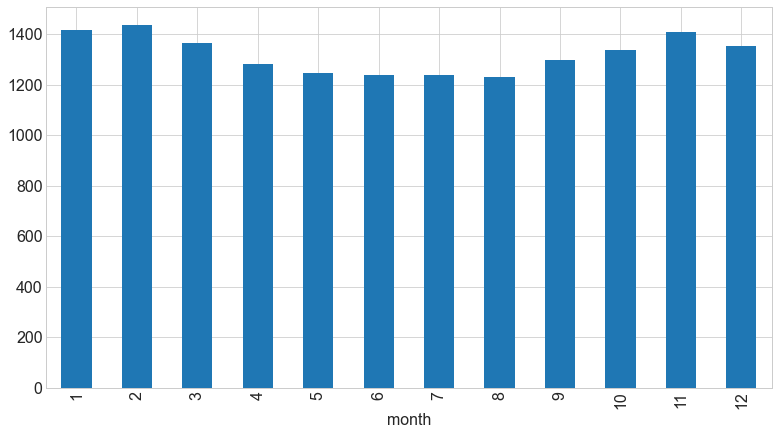

In [20]:
# Plot mean temperature by month (bar plot)
train.groupby('month').Consumption.mean().plot.bar()

In [21]:
# make new column weekday
train['weekday'] = train.Consumption.index.day_name()

<AxesSubplot:xlabel='weekday'>

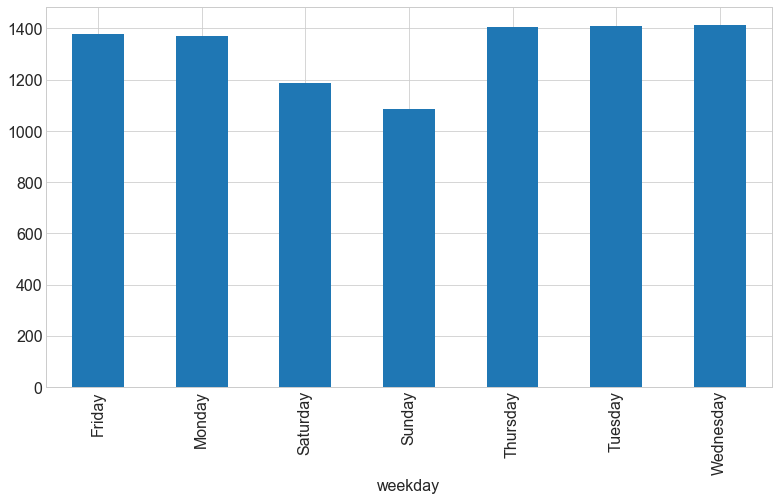

In [22]:
# Plot mean temperature by weekday (bar plot)
train.groupby('weekday').Consumption.mean().plot.bar()

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

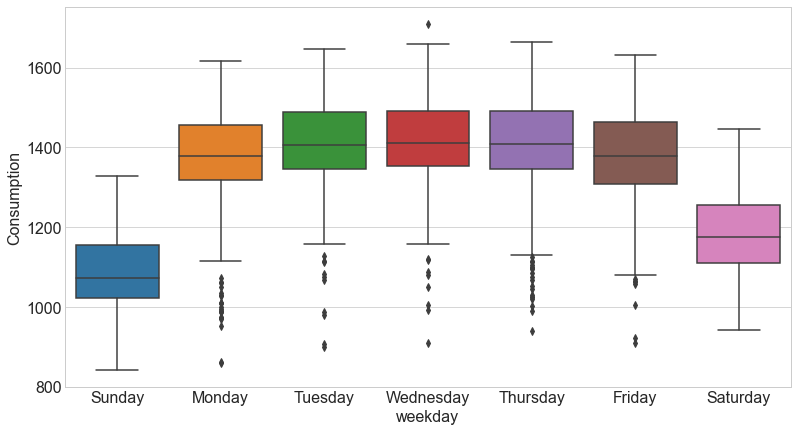

In [24]:
sns.boxplot(data = train, x = 'weekday', y = 'Consumption')

<AxesSubplot:xlabel='month', ylabel='Consumption'>

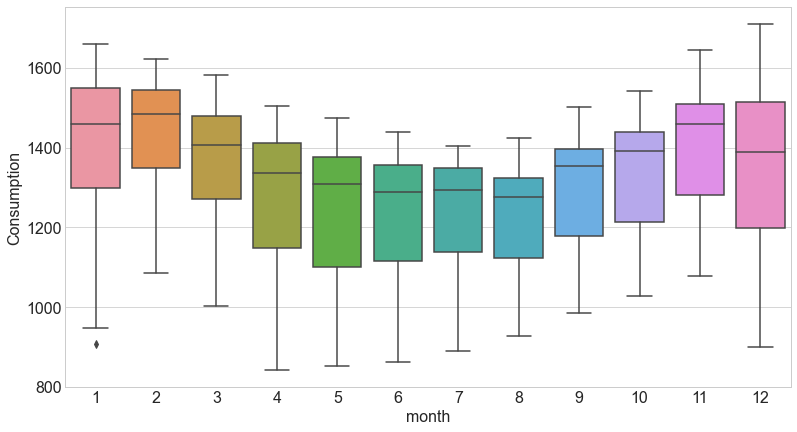

In [25]:
sns.boxplot(data = train, x = 'month', y = 'Consumption')

<AxesSubplot:xlabel='year', ylabel='Consumption'>

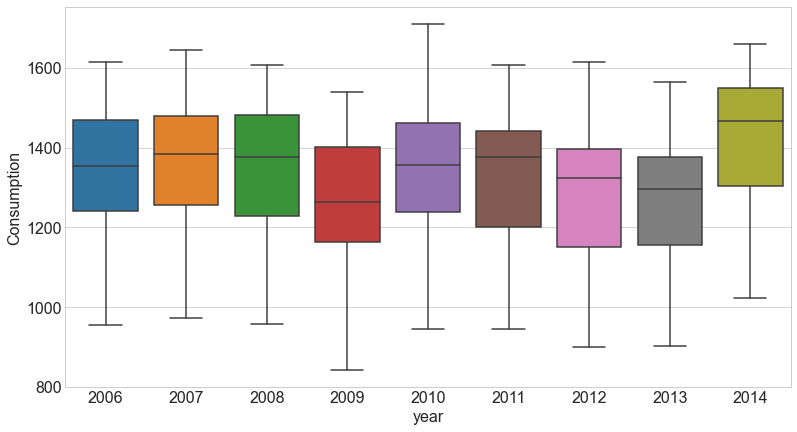

In [26]:
sns.boxplot(data = train, x = 'year', y = 'Consumption')

<AxesSubplot:xlabel='month', ylabel='Wind'>

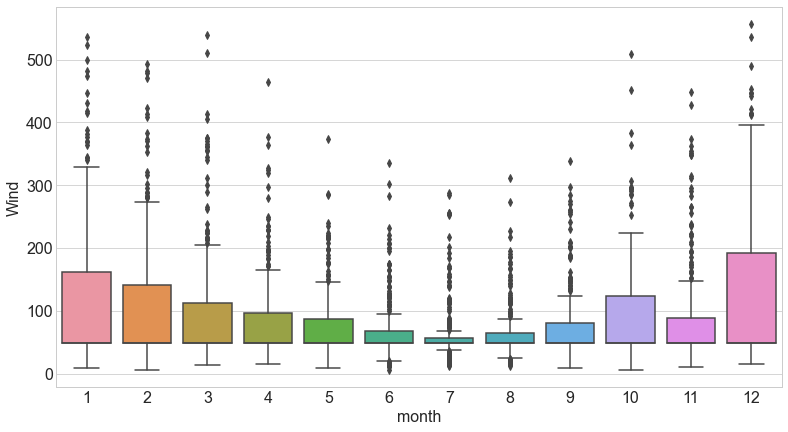

In [32]:
sns.boxplot(data = train, x = 'month', y = 'Wind')

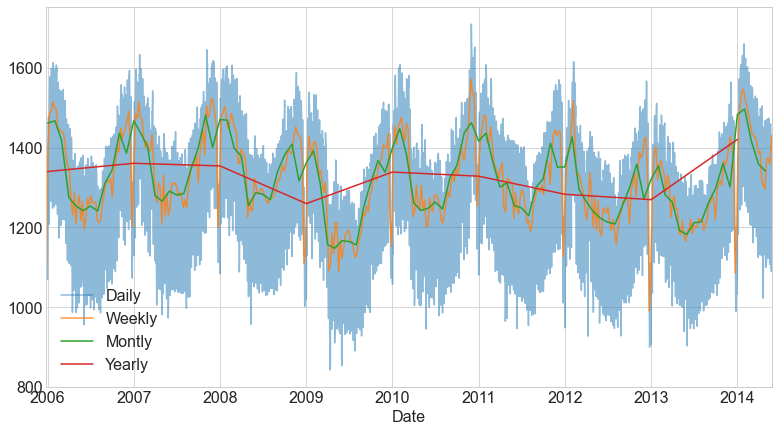

In [27]:
train.Consumption.resample('D').mean().plot(alpha=.5, label='Daily')
train.Consumption.resample('W').mean().plot(alpha=.8, label='Weekly')
train.Consumption.resample('M').mean().plot(label='Montly')
train.Consumption.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [28]:
table = train.Consumption.groupby([train.Consumption.index.year, train.Consumption.index.month]).mean().unstack()
table

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1340.952769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


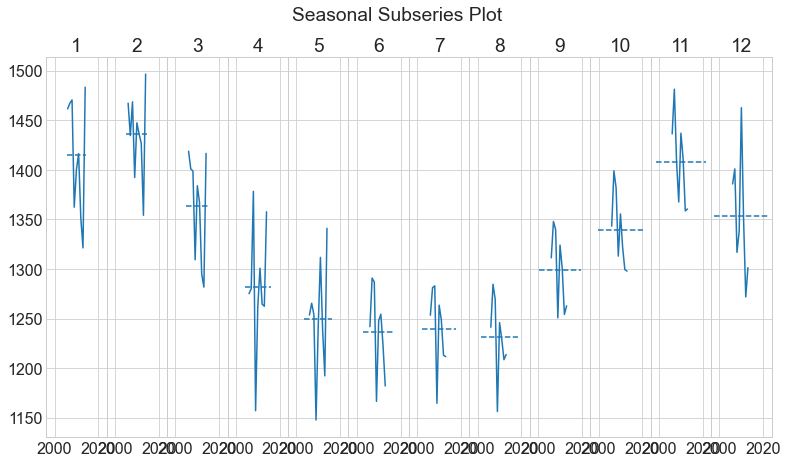

In [29]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)